# Imports

In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import sys
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

import re
#import command

D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
from imports import *
from structured import *

In [ ]:
f'{2*8}'

In [ ]:
name = "Eric"
age = 74
f"Hello, {name}. You are {age}."

# Read Data

In [3]:
def load_df(csv_path='input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [216]:
df_temp = load_df('input/test.csv')

Loaded test.csv. Shape: (804684, 53)


In [50]:
def display_all(df):
    with pd.option_context('display.max_rows',1000,'display.max_columns',1000):
        display(df)

In [51]:
display_all(df_temp.head().T)

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,20160902,20160902,20160902,20160902,20160902
fullVisitorId,1131660440785968503,377306020877927890,3895546263509774583,4763447161404445595,27294437909732085
sessionId,1131660440785968503_1472830385,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,27294437909732085_1472822600
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472830385,1472880147,1472865386,1472881213,1472822600
visitNumber,1,1,1,1,2
visitStartTime,1472830385,1472880147,1472865386,1472881213,1472822600
device.browser,Chrome,Firefox,Chrome,UC Browser,Chrome
device.browserSize,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [10]:
df_temp.describe(include='all')

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
count,804684,8.046840e+05,804684,804684,804684,8.046840e+05,804684.000000,8.046840e+05,804684,804684,...,53862,53814,53814,53814,804684,260513,413652,804684,235323,804684
unique,8,NaN,617242,803863,1,NaN,NaN,NaN,109,1,...,41317,1,10,3,31,1,2415,7,2197,324
top,Organic Search,NaN,7282998257608986241,2936047022083522664_1512719881,Not Socially Engaged,NaN,NaN,NaN,Chrome,not available in demo dataset,...,CN_Whvvc_9UCFd6LswodGTgKCQ,False,1,RHS,(not set),True,(not provided),organic,/,google
freq,357402,NaN,272,2,804684,NaN,NaN,NaN,552692,804684,...,74,53814,52551,42246,728927,260513,346391,357402,62770,417104
mean,NaN,2.017496e+07,NaN,NaN,NaN,1.513339e+09,2.414087,1.513339e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.573101e+03,NaN,NaN,NaN,6.676000e+06,9.431737,6.676000e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.017080e+07,NaN,NaN,NaN,1.501656e+09,1.000000,1.501657e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.017101e+07,NaN,NaN,NaN,1.507548e+09,1.000000,1.507548e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.017121e+07,NaN,NaN,NaN,1.513125e+09,1.000000,1.513125e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.018022e+07,NaN,NaN,NaN,1.519227e+09,1.000000,1.519227e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# inital process

In [217]:
df_temp['visitStartTime']=pd.to_datetime(df_temp['visitStartTime'], unit='s')

In [218]:
df_temp["totals.transactionRevenue"].fillna(0, inplace=True)

KeyError: 'totals.transactionRevenue'

In [54]:
df_temp['totals.transactionRevenue'] = np.log1p(df_temp['totals.transactionRevenue'].astype('float'))

In [55]:
gdf = df_temp.groupby('fullVisitorId')['totals.transactionRevenue'].sum().reset_index()

In [56]:
gdf.head()

,fullVisitorId,totals.transactionRevenue
0,0000010278554503158,0.0
1,0000020424342248747,0.0
2,0000027376579751715,0.0
3,0000039460501403861,0.0
4,0000040862739425590,0.0


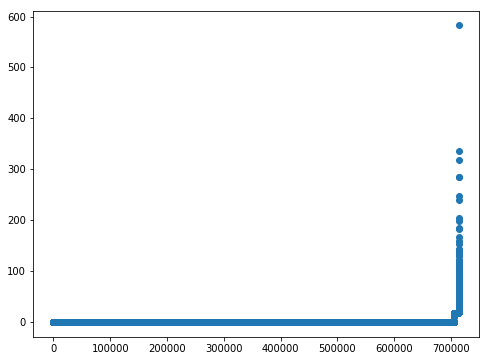

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]),np.sort(gdf['totals.transactionRevenue']))

In [219]:
add_datepart(df_temp,'visitStartTime')

In [19]:
df_temp.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,device.browser,device.browserSize,device.browserVersion,...,visitStartTimeDay,visitStartTimeDayofweek,visitStartTimeDayofyear,visitStartTimeIs_month_end,visitStartTimeIs_month_start,visitStartTimeIs_quarter_end,visitStartTimeIs_quarter_start,visitStartTimeIs_year_end,visitStartTimeIs_year_start,visitStartTimeElapsed
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,Chrome,not available in demo dataset,not available in demo dataset,...,2,4,246,False,False,False,False,False,False,1472830385
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,Firefox,not available in demo dataset,not available in demo dataset,...,3,5,247,False,False,False,False,False,False,1472880147
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,Chrome,not available in demo dataset,not available in demo dataset,...,3,5,247,False,False,False,False,False,False,1472865386
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,UC Browser,not available in demo dataset,not available in demo dataset,...,3,5,247,False,False,False,False,False,False,1472881213
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,Chrome,not available in demo dataset,not available in demo dataset,...,2,4,246,False,False,False,False,False,False,1472822600


In [220]:
train_cats(df_temp)

In [49]:
df_temp.channelGrouping.cat.categories

Index(['(Other)', 'Affiliates', 'Direct', 'Display', 'Organic Search',
       'Paid Search', 'Referral', 'Social'],
      dtype='object')

In [222]:
os.makedirs('tmp', exist_ok=True)
df_temp.to_feather('tmp/test1')

# pre_precessing

In [186]:
df_temp = pd.read_feather('tmp/train1')

In [63]:
df_temp[df_temp['totals.transactionRevenue']>0]['totals.transactionRevenue'][0:15]

752    17.449406
753    19.541283
799    18.035459
802    17.083177
859    20.168401
866    15.941359
893    19.796243
910    16.996892
922    17.384480
925    17.373142
930    18.216114
942    20.118715
971    17.971891
974    18.580586
976    17.593087
Name: totals.transactionRevenue, dtype: float64

In [64]:
df, y, nas = proc_df(df_temp, 'totals.transactionRevenue')

In [36]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,device.browser,device.browserSize,device.browserVersion,...,visitStartTimeDay,visitStartTimeDayofweek,visitStartTimeDayofyear,visitStartTimeIs_month_end,visitStartTimeIs_month_start,visitStartTimeIs_quarter_end,visitStartTimeIs_quarter_start,visitStartTimeIs_year_end,visitStartTimeIs_year_start,visitStartTimeElapsed
0,5,20160902,5065,5542,1,1472830385,1,6,1,1,...,2,4,246,False,False,False,False,False,False,1472830385
1,5,20160902,16968,18614,1,1472880147,1,9,1,1,...,3,5,247,False,False,False,False,False,False,1472880147
2,5,20160902,17482,19196,1,1472865386,1,6,1,1,...,3,5,247,False,False,False,False,False,False,1472865386
3,5,20160902,21437,23580,1,1472881213,1,26,1,1,...,3,5,247,False,False,False,False,False,False,1472881213
4,5,20160902,12264,13418,1,1472822600,2,6,1,1,...,2,4,246,False,False,False,False,False,False,1472822600


In [141]:
def split_values(a,n): return a[:n].copy(), a[n:].copy()
n_valid = 200000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_values(df_temp,n_trn)
X_train, X_valid = split_values(df,n_trn)
y_train, y_valid = split_values(y,n_trn)

In [139]:
display_all(X_train.head())

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device.browser,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.campaign,trafficSource.keyword,trafficSource.referralPath,trafficSource.source,visitStartTimeYear,visitStartTimeMonth,visitStartTimeWeek,visitStartTimeDay,visitStartTimeDayofweek,visitStartTimeDayofyear,visitStartTimeIs_month_end,visitStartTimeIs_month_start,visitStartTimeIs_quarter_end,visitStartTimeIs_quarter_start,visitStartTimeIs_year_end,visitStartTimeIs_year_start,visitStartTimeElapsed,socialEngagementType_Not Socially Engaged,socialEngagementType_nan,device.browserSize_not available in demo dataset,device.browserSize_nan,device.browserVersion_not available in demo dataset,device.browserVersion_nan,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet,device.deviceCategory_nan,device.flashVersion_not available in demo dataset,device.flashVersion_nan,device.language_not available in demo dataset,device.language_nan,device.mobileDeviceBranding_not available in demo dataset,device.mobileDeviceBranding_nan,device.mobileDeviceInfo_not available in demo dataset,device.mobileDeviceInfo_nan,device.mobileDeviceMarketingName_not available in demo dataset,device.mobileDeviceMarketingName_nan,device.mobileDeviceModel_not available in demo dataset,device.mobileDeviceModel_nan,device.mobileInputSelector_not available in demo dataset,device.mobileInputSelector_nan,device.operatingSystemVersion_not available in demo dataset,device.operatingSystemVersion_nan,device.screenColors_not available in demo dataset,device.screenColors_nan,device.screenResolution_not available in demo dataset,device.screenResolution_nan,geoNetwork.cityId_not available in demo dataset,geoNetwork.cityId_nan,geoNetwork.continent_(not set),geoNetwork.continent_Africa,geoNetwork.continent_Americas,geoNetwork.continent_Asia,geoNetwork.continent_Europe,geoNetwork.continent_Oceania,geoNetwork.continent_nan,geoNetwork.latitude_not available in demo dataset,geoNetwork.latitude_nan,geoNetwork.longitude_not available in demo dataset,geoNetwork.longitude_nan,geoNetwork.networkLocation_not available in demo dataset,geoNetwork.networkLocation_nan,totals.bounces_1,totals.bounces_nan,totals.newVisits_1,totals.newVisits_nan,totals.visits_1,totals.visits_nan,trafficSource.adwordsClickInfo.adNetworkType_Google Search,trafficSource.adwordsClickInfo.adNetworkType_Search partners,trafficSource.adwordsClickInfo.adNetworkType_nan,trafficSource.adwordsClickInfo.criteriaParameters_not available in demo dataset,trafficSource.adwordsClickInfo.criteriaParameters_nan,trafficSource.adwordsClickInfo.isVideoAd_False,trafficSource.adwordsClickInfo.isVideoAd_nan,trafficSource.adwordsClickInfo.slot_RHS,trafficSource.adwordsClickInfo.slot_Top,trafficSource.adwordsClickInfo.slot_nan,trafficSource.campaignCode_11251kjhkvahf,trafficSource.campaignCode_nan,trafficSource.isTrueDirect_True,trafficSource.isTrueDirect_nan,trafficSource.medium_(none),trafficSource.medium_(not set),trafficSource.medium_affiliate,trafficSource.medium_cpc,trafficSource.medium_cpm,trafficSource.medium_organic,trafficSource.medium_referral,trafficSource.medium_nan
0,5,20160902,80510,101786,1472830385,1,12,False,17,259,205,1,24933,151,22,1,1,0,0,0,1,12,0,150,2016,9,35,2,4,246,False,False,False,False,False,False,1472830385,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
1,5,20160902,269008,340202,1472880147,1,17,False,8,649,13,94,6674,376,2,1,1,0,0,0,1,12,0,150,2016,9,35,3,5,247,False,False,False,False,False,False,1472880147,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,

In [140]:
display_all(df_temp.head())

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitStartTimeYear,visitStartTimeMonth,visitStartTimeWeek,visitStartTimeDay,visitStartTimeDayofweek,visitStartTimeDayofyear,visitStartTimeIs_month_end,visitStartTimeIs_month_start,visitStartTimeIs_quarter_end,visitStartTimeIs_quarter_start,visitStartTimeIs_year_end,visitStartTimeIs_year_start,visitStartTimeElapsed
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,2016,9,35,2,4,246,False,False,False,False,False,False,1472830385
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,2016,9,35,3,5,247,False,False,False,False,False,False,1472880147
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,

In [66]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [67]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,max_features=0.5,n_estimators=40,oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 32.5 s
[1.0473625473732695, 1.6678815573942931, 0.72762366703160164, 0.29941045594923432, 0.28563689275414594]


# feature importance

In [68]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,max_features=0.5,n_estimators=40,oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 31.7 s
[1.0492807250381113, 1.665210598401027, 0.72662507369562124, 0.30165251878732957, 0.28619389645886695]


In [6]:
??rf_feat_importance

In [69]:
fi = rf_feat_importance(m, df); fi[:20]

,cols,imp
37,totals.pageviews,0.259270
35,totals.hits,0.139843
3,sessionId,0.056114
2,fullVisitorId,0.055165
65,visitStartTimeElapsed,0.048501
5,visitId,0.047555
56,visitStartTimeDay,0.045382
58,visitStartTimeDayofyear,0.034366
6,visitNumber,0.031518
57,visitStartTimeDayofweek,0.028684


In [70]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

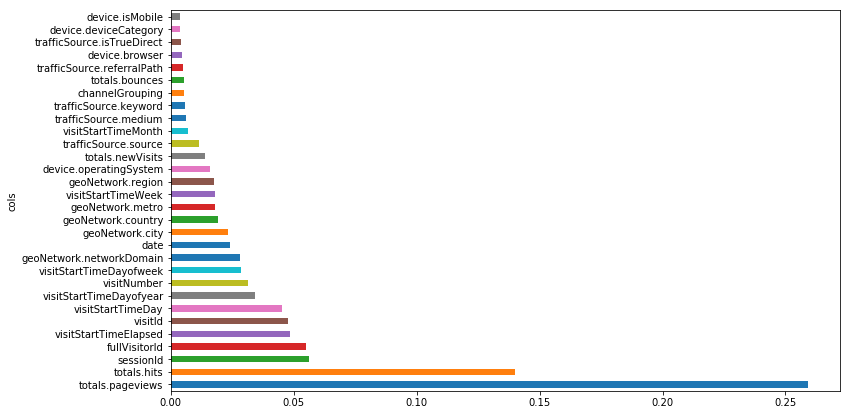

In [71]:
plot_fi(fi[:30])

In [72]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

26

In [73]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_values(df_keep, n_trn)

In [74]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,max_features=0.5,n_estimators=40,oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 19.8 s
[1.0560401514158666, 1.67222809449012, 0.72309158726441658, 0.29575419357436106, 0.28141911339871073]


# one_hot encoding

In [77]:
display_all(df_keep.T)

0           1           2           3       \
totals.pageviews                     1           1           1           1   
totals.hits                          1           1           1           1   
sessionId                       101786      340202      351205      429918   
fullVisitorId                    80510      269008      277679      339714   
visitStartTimeElapsed       1472830385  1472880147  1472865386  1472881213   
visitId                     1472830385  1472880147  1472865386  1472881213   
visitStartTimeDay                    2           3           3           3   
visitStartTimeDayofyear            246         247         247         247   
visitNumber                          1           1           1           1   
visitStartTimeDayofweek              4           5           5           5   
geoNetwork.networkDomain         24933        6674       25842       25842   
date                          20160902    20160902    20160902    20160902   
geoNetwork.city                    259         649         326         649   
geoNetwork.country                 205          13         182          95   
geoNetwork.metro                     1          94           1          94   
visitStartTimeWeek                  35          35          35          35   
geoNetwork.region                  151         376          79         376   
device.operatingSystem              17           8          17           7   
totals.newVisits                     1           1           1           1   
trafficSource.source               150         150         150         150   
visitStartTimeMonth                  9           9           9           9   
trafficSource.medium                 6           6           6           6   
trafficSource.keyword               12          12          12        1099   
channelGrouping                      5           5           5           5   
totals.bounces                       1           1           1           1   
trafficSource.referralPath           0           0           0           0   

                                4           5           6           7       \
totals.pageviews                     1           1           1           1   
totals.hits                          1           1           1           1   
sessionId                       245655      264812      171150      484854   
fullVisitorId                   194518      209753      135764      383204   
visitStartTimeElapsed       1472822600  1472807194  1472817241  1472812602   
visitId                     1472822600  1472807194  1472817241  1472812602   
visitStartTimeDay                    2           2           2           2   
visitStartTimeDayofyear            246         246         246         246   
visitNumber                          2           1           1           1   
visitStartTimeDayofweek              4           4           4           4   
geoNetwork.networkDomain         25842        8279       25842        2863   
date                          20160902    20160902    20160902    20160902   
geoNetwork.city                    649         649         649          86   
geoNetwork.country                 212         101         153          13   
geoNetwork.metro                    94          94          94           1   
visitStartTimeWeek                  35          35          35          35   
geoNetwork.region                  376         376         376         271   
device.operatingSystem               2          17          17          17   
totals.newVisits                     0           1           1           1   
trafficSource.source               150         150         150         150   
visitStartTimeMonth                  9           9           9           9   
trafficSource.medium                 6           6           6           6   
trafficSource.keyword               12          12          12          12   
channelGrouping                      5           5   

In [78]:
df_trn2, y_trn, nas = proc_df(df_temp, 'totals.transactionRevenue', max_n_cat=7)

In [79]:
X_train, X_valid = split_values(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.0336547778414245, 1.6618214619883658, 0.73470667578864424, 0.30449226333152801, 0.28611808033044384]


In [113]:
len(X_train),len(X_valid)

(703653, 200000)

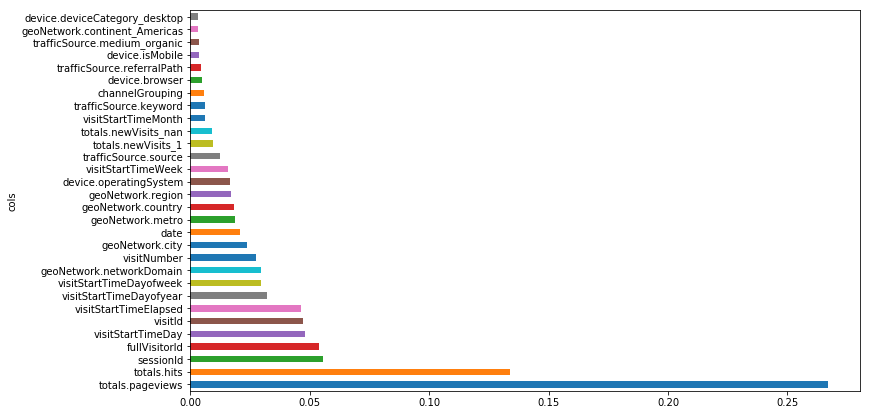

In [80]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:30])

# removing redundant features

In [81]:
from scipy.cluster import hierarchy as hc

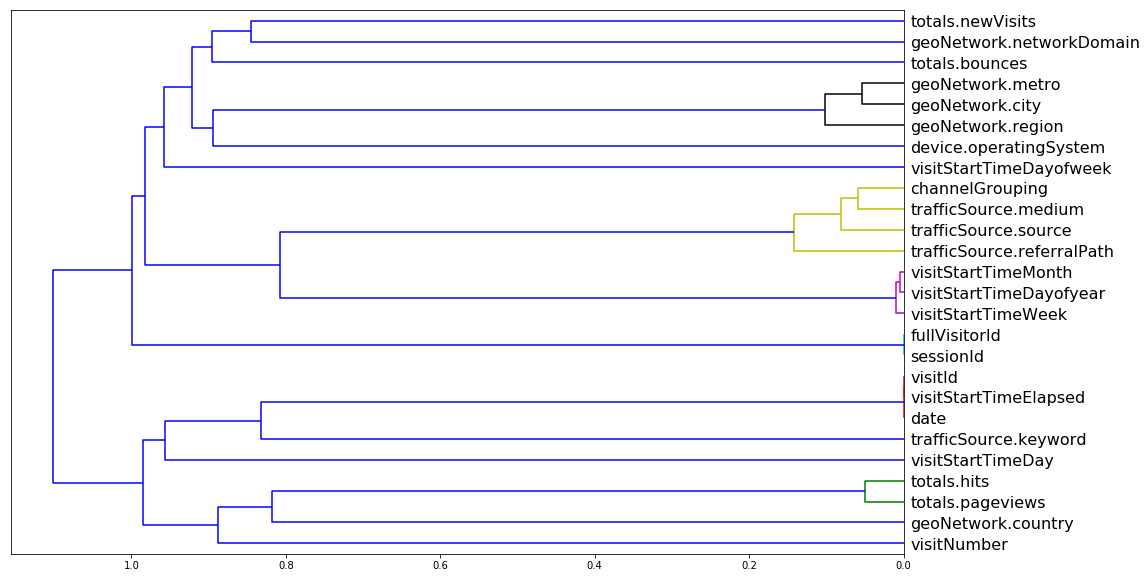

In [82]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [96]:
def get_oob_score(df):
    m = RandomForestRegressor(n_jobs=-1,n_estimators = 30,min_samples_leaf=5, max_features = 0.6,oob_score=True)
    x,_ = split_values(df,n_trn)
    m.fit(x,y_train)
    return m.oob_score_

In [94]:
col = ['visitId','visitStartTimeElapsed','date','visitStartTimeMonth','visitStartTimeDayofyear']
get_oob_score(df_keep)

0.286474054624


In [95]:
for c in col: print(c, get_oob_score(df_keep.drop(c, axis=1)))

D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.287615477638
visitId None


D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.283040280773
visitStartTimeElapsed None
0.28443295507
date None


D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.287316120641
visitStartTimeMonth None


D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.284246232679
visitStartTimeDayofyear None


In [100]:
col_redun = ['date','visitStartTimeDayofyear']
get_oob_score(df_keep.drop(col_redun, axis=1))

D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.28536649382406531

In [101]:
df_keep.shape

(903653, 26)

In [107]:
np.save('tmp/keep_col.npy',np.array(df_keep.columns))

In [111]:
keep_cols = np.load('tmp/keep_col.npy')
df_keep = df[keep_cols]

In [113]:
reset_rf_samples()


In [115]:
??reset_rf_samples

In [152]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.0503098145775567, 1.6658380219972062, 0.72608858193101578, 0.30112616826554062, 0.28456564355171987]


# tree interpreter

In [118]:
from treeinterpreter import treeinterpreter as ti

In [162]:
df_train, df_valid = split_values(df_temp[df_keep.columns], n_trn)

In [160]:
row = df_valid.values[None,0]; row

array([['2', '2', '556572256741547929_1479063632', '556572256741547929', 1479063632, 1479063632, 13, 318, 1,
        6, 'unknown.unknown', 20161113, 'not available in demo dataset', 'Macedonia (FYROM)',
        'not available in demo dataset', 45, 'not available in demo dataset', 'Windows', '1', 'youtube.com',
        11, 'referral', nan, 'Social', nan, '/yt/about/']], dtype=object)

In [153]:
prediction, bias, contributions = ti.predict(m, row)

In [154]:
prediction[0], bias[0]

(0.0, 0.22743213386805233)

In [155]:
idxs = np.argsort(contributions[0])

In [158]:
idxs.shape

(66,)

In [159]:
df_valid.shape

(200000, 26)

In [157]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

IndexError: index 26 is out of bounds for axis 1 with size 26

# extrapolation

In [163]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

D:\Anaconda_app\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.99958059122251575

In [165]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
4,visitStartTimeElapsed,0.314064
5,visitId,0.208751
11,date,0.200412
6,visitStartTimeDay,0.095517
7,visitStartTimeDayofyear,0.079958
9,visitStartTimeDayofweek,0.058915
15,visitStartTimeWeek,0.030245
20,visitStartTimeMonth,0.010206
25,trafficSource.referralPath,0.000360
1,totals.hits,0.000335


In [167]:
feats = ['visitStartTimeElapsed','visitId','date']
(X_train[feats]/1000).describe()

,visitStartTimeElapsed,visitId,date
count,7.036530e+05,7.036530e+05,703653.000000
mean,1.484381e+06,1.484381e+06,20165.570084
std,8.695747e+03,8.695746e+03,4.687705
min,1.470035e+06,1.470035e+06,20160.801000
25%,1.477518e+06,1.477518e+06,20161.026000
50%,1.482326e+06,1.482326e+06,20161.221000
75%,1.491811e+06,1.491811e+06,20170.410000
max,1.501657e+06,1.501657e+06,20170.801000


In [168]:
(X_valid[feats]/1000).describe()

,visitStartTimeElapsed,visitId,date
count,2.000000e+05,2.000000e+05,200000.000000
mean,1.487211e+06,1.487211e+06,20166.994110
std,9.772806e+03,9.772806e+03,4.562827
min,1.470294e+06,1.470293e+06,20160.804000
25%,1.478376e+06,1.478376e+06,20161.105000
50%,1.488264e+06,1.488264e+06,20170.227000
75%,1.496128e+06,1.496128e+06,20170.530000
max,1.501571e+06,1.501571e+06,20170.731000


In [169]:
x.drop(feats,axis=1,inplace=True)
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.92301912349098603

In [170]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
5,visitStartTimeDayofyear,0.293253
4,visitStartTimeDay,0.192078
12,visitStartTimeWeek,0.115597
7,visitStartTimeDayofweek,0.112179
17,visitStartTimeMonth,0.044095
2,sessionId,0.038208
3,fullVisitorId,0.037177
8,geoNetwork.networkDomain,0.030549
10,geoNetwork.country,0.027207
9,geoNetwork.city,0.015286


In [175]:
set_rf_samples(50000)
feats=['visitStartTimeElapsed','visitId','date', 'visitStartTimeDayofyear', 'visitStartTimeDay', 'visitStartTimeWeek',
         'visitStartTimeDayofweek' ]
X_train, X_valid = split_values(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                        max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.6390787623847007, 1.7029956653320848, 0.33292458492333399, 0.26960074171779758, 0.27358560684105659]


In [176]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_values(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

visitStartTimeElapsed
[1.6420173061721024, 1.7067026895193789, 0.33053057248878104, 0.26641746334884298, 0.27186698197866155]
visitId
[1.6434908314045034, 1.7074935004223375, 0.32932848683800298, 0.26573748613432546, 0.27086016298735127]
date
[1.640192275613885, 1.710021931314133, 0.33201791755941512, 0.26356130615502649, 0.27253455636045387]
visitStartTimeDayofyear
[1.6424064675061354, 1.7074041547011387, 0.33021320374025698, 0.26581432566252106, 0.27129267438245264]
visitStartTimeDay
[1.6403136158265614, 1.701767093140289, 0.33191908026176864, 0.27065420832865728, 0.27393997195226327]
visitStartTimeWeek
[1.644629746411412, 1.7110242291011686, 0.32839863374646017, 0.2626977532607625, 0.26968943596153061]
visitStartTimeDayofweek
[1.6431975926275504, 1.7078759594761581, 0.32956779373940859, 0.2654085164520682, 0.27132645337406858]


In [177]:
reset_rf_samples()

In [181]:
df_subs = df_keep.drop(['visitStartTimeElapsed','visitId','date', 'visitStartTimeDayofyear', 'visitStartTimeDay', 'visitStartTimeWeek'], axis=1)
X_train, X_valid = split_values(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.0871455285404186, 1.667183327020979, 0.70653882190843387, 0.29999691306873244, 0.28541972910611002]


In [212]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, min_samples_leaf=5,
          n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)


Wall time: 1min 8s
[1.2536575747326095, 1.6539719868214522, 0.60975877438239368, 0.31104709174203993, 0.31377138983060671]


# delete more features

In [207]:
fi = rf_feat_importance(m, X_train); fi[:20]


,cols,imp
0,totals.pageviews,0.318851
1,totals.hits,0.176125
2,sessionId,0.075019
3,fullVisitorId,0.073274
14,visitStartTimeMonth,0.059662
4,visitNumber,0.041376
5,visitStartTimeDayofweek,0.037962
6,geoNetwork.networkDomain,0.034910
8,geoNetwork.country,0.028601
7,geoNetwork.city,0.027957


In [208]:
to_keep_final = fi[fi.imp>0.005].cols; len(to_keep_final)

19

In [211]:
df_final = df_keep[to_keep_final].copy()
df_subs = df_keep.drop(['visitStartTimeElapsed','visitId','date', 'visitStartTimeDayofyear', 'visitStartTimeDay', 'visitStartTimeWeek'], axis=1)
X_train, X_valid = split_values(df_subs, n_trn)

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, min_samples_leaf=5,
          n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

# use test set 

In [223]:
df_test = pd.read_feather('tmp/test1')

In [224]:
df_test = df_test[df_subs.columns]

In [226]:
display_all(X_train.head())

,totals.pageviews,totals.hits,sessionId,fullVisitorId,visitNumber,visitStartTimeDayofweek,geoNetwork.networkDomain,geoNetwork.city,geoNetwork.country,geoNetwork.metro,geoNetwork.region,device.operatingSystem,totals.newVisits,trafficSource.source,visitStartTimeMonth,trafficSource.medium,trafficSource.keyword,channelGrouping,totals.bounces,trafficSource.referralPath
0,1,1,101786,80510,1,4,24933,259,205,1,151,17,1,150,9,6,12,5,1,0
1,1,1,340202,269008,1,5,6674,649,13,94,376,8,1,150,9,6,12,5,1,0
2,1,1,351205,277679,1,5,25842,326,182,1,79,17,1,150,9,6,12,5,1,0
3,1,1,429918,339714,1,5,25842,649,95,94,376,7,1,150,9,6,1099,5,1,0
4,1,1,245655,194518,2,4,25842,649,212,94,376,2,0,150,9,6,12,5,1,0


In [227]:
display_all(df_test.head())

,totals.pageviews,totals.hits,sessionId,fullVisitorId,visitNumber,visitStartTimeDayofweek,geoNetwork.networkDomain,geoNetwork.city,geoNetwork.country,geoNetwork.metro,geoNetwork.region,device.operatingSystem,totals.newVisits,trafficSource.source,visitStartTimeMonth,trafficSource.medium,trafficSource.keyword,channelGrouping,totals.bounces,trafficSource.referralPath
0,4,4,6167871330617112363_1508151024,6167871330617112363,2,0,myrepublic.com.sg,(not set),Singapore,(not set),(not set),Macintosh,NaN,google,10,organic,(not provided),Organic Search,NaN,NaN
1,5,5,0643697640977915618_1508175522,0643697640977915618,1,0,rima-tde.net,Zaragoza,Spain,(not set),Aragon,Windows,1,google,10,organic,(not provided),Organic Search,NaN,NaN
2,7,7,6059383810968229466_1508143220,6059383810968229466,1,0,sfr.net,not available in demo dataset,France,not available in demo dataset,not available in demo dataset,Macintosh,1,google,10,organic,(not provided),Organic Search,NaN,NaN
3,4,8,2376720078563423631_1508193530,2376720078563423631,1,0,(not set),Mountain View,United States,San Francisco-Oakland-San Jose CA,California,iOS,1,google,10,organic,(not provided),Organic Search,NaN,NaN
4,4,9,2314544520795440038_1508217442,2314544520795440038,1,1,(not set),San Jose,United States,San Francisco-Oakland-San Jose CA,California,Macintosh,1,google,10,organic,(not provided),Organic Search,NaN,NaN


In [228]:
test_X,_,nas = proc_df(df_test)

In [244]:
??proc_df

In [245]:
test_X.sessionId.cat.categories

AttributeError: Can only use .cat accessor with a 'category' dtype

In [232]:
test_X['revenue'] = m.predict(test_X)

In [234]:
test_X['revenue']

0         0.140732
1         0.342425
2         0.576449
3         0.009189
4         0.000000
5         0.037672
6         0.203261
7         0.055633
8         0.678405
9         0.173017
10        0.028132
11        0.172929
12        0.150826
13        0.039488
14        0.300809
15        0.070265
16        0.298316
17        0.111281
18        0.166609
19        0.069256
20        0.206832
21        0.399752
22        0.155239
23        1.547797
24        1.095726
25        0.379322
26        0.316431
27        0.054492
28        0.018835
29        0.181288
            ...   
804654    0.126158
804655    0.173353
804656    0.112601
804657    0.066855
804658    0.157824
804659    0.059722
804660    0.042619
804661    0.348520
804662    0.078647
804663    0.000000
804664    0.000000
804665    0.044038
804666    0.062429
804667    0.029729
804668    0.029729
804669    0.066902
804670    0.000000
804671    0.021945
804672    0.716974
804673    0.358177
804674    0.244349
804675    0.